# 112. Seaborn Introduction

### Seaborn 이 해결해 주는 2 가지 matplotlib 의 문제

- Default Matplotlib parameters

- dataframe 을 이용할 경우의 문제 (Matplotlib 은 pandas 에 최적화된 plot 제공 않음)

### Seaborn 은 Matplotlib 의 대체품이 아니라 보완품이지만 다음의 중요한 feature 를 포함하고 있다.

- 내장된 테마  

- univariate 및 bivariate data 시각화  

- linear regression model 의 fitting 및 시각화  

- 통계적 시계열 data 의 plotting  

- Numpy 및 Pandas DataFrame 과 잘 연동  

- Matplotlib graphic 의 내장 theme 포함

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Matplotlib 과 Seaborn 의 미적인 측면 비교 - 1

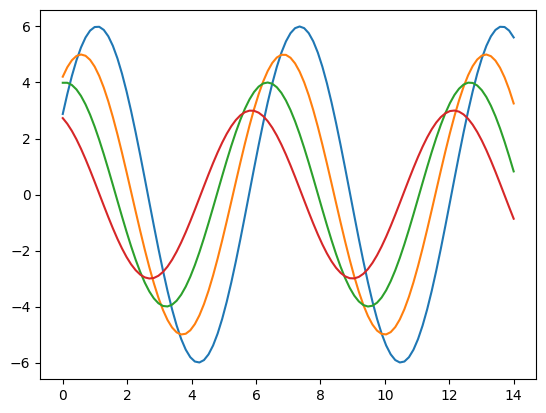

In [2]:
# sinplot 함수 정의
def sinplot():
    # x축 값 생성: 0에서 14까지 균등하게 분포된 100개의 값
    x = np.linspace(0, 14, 100)
    
    # 1부터 4까지 반복
    for i in range(1, 5):
        # 각 i에 대해 y값 계산 및 플롯 생성
        # np.sin(x + i * 0.5): x값에 i * 0.5를 더해 사인 함수 값 계산
        # * (7 - i): 사인 함수 값을 스케일링
        plt.plot(x, np.sin(x + i * .5) * (7 - i))

sinplot()

### seaborn default 로 setting

- `set()` : alias of `set_theme()`

- 한 번에 여러 테마 매개 변수를 설정합니다.

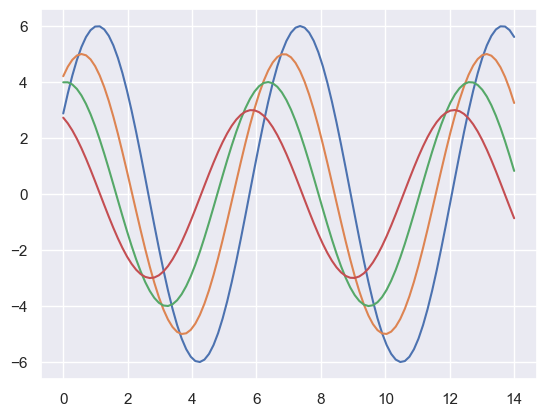

In [3]:
# Seaborn 스타일을 기본 설정으로 적용
sns.set()

sinplot()

### seaborn 의 style 테마 

- Darkgrid : default  
- Whitegrid 
- Dark  
- White  
- Ticks

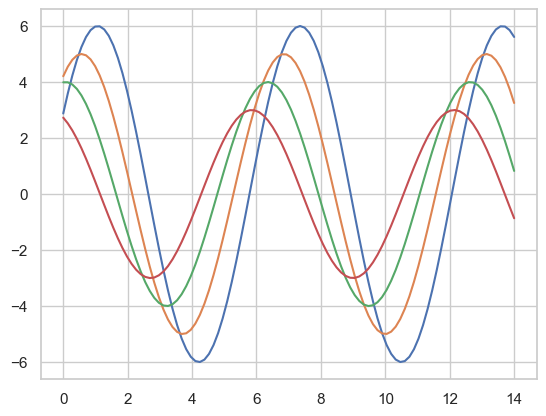

In [4]:
# Seaborn의 스타일을 "whitegrid"로 설정
sns.set_style("whitegrid")

sinplot()

### axis 의 top, right spine 제거

- despine : 플롯에서 상단 및 오른쪽 스파인 제거.

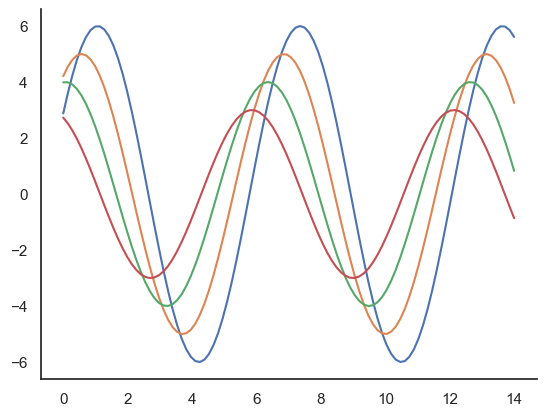

In [5]:
# Seaborn의 스타일을 "white"로 설정
sns.set_style("white")

# Matplotlib의 Figure와 Axes 생성
fig, ax = plt.subplots()

# 그래프의 테두리(스파인)를 제거
sns.despine()

# 사인파 그래프를 그리는 사용자 정의 함수 호출
sinplot()

## Matplotlib 과 Seaborn 의 미적인 측면 비교 - 2

* random walk data

In [6]:
# 랜덤 상태를 초기화하여 재현 가능한 난수를 생성
rng = np.random.RandomState(0)

# x축 값 생성: 0부터 10까지 균등 간격으로 500개의 값 생성
x = np.linspace(0, 10, 500)

# y축 값 생성: 500개의 난수를 생성하여 누적 합(cumulative sum) 계산
# y는 500개의 행과 6개의 열로 구성된 배열 (6개의 데이터 시리즈를 의미)
y = np.cumsum(rng.randn(500, 6), 0)

# x와 y 배열의 shape(형상)을 출력
x.shape, y.shape  # 결과: x는 (500,), y는 (500, 6)

((500,), (500, 6))

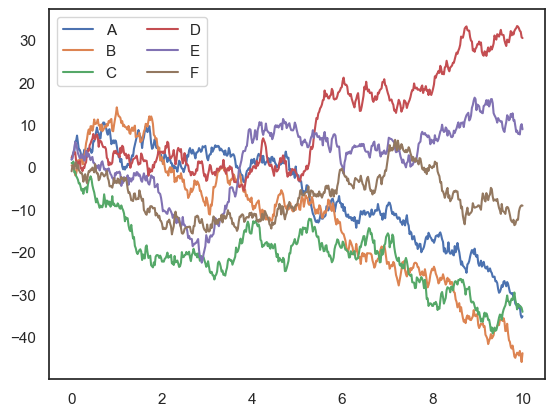

In [7]:
# 선형 그래프 그리기
# x: x축 데이터, y: y축 데이터 (6개의 선으로 구성된 다차원 데이터)
plt.plot(x, y)

# 범례 추가
# 'ABCDEF'는 각 선의 레이블을 나타냄 (각 선에 대해 A, B, C, D, E, F로 표시)
# ncol=2: 범례를 2열로 나누어 표시
# loc='upper left': 범례를 그래프의 왼쪽 상단에 배치
plt.legend('ABCDEF', ncol=2, loc='upper left');

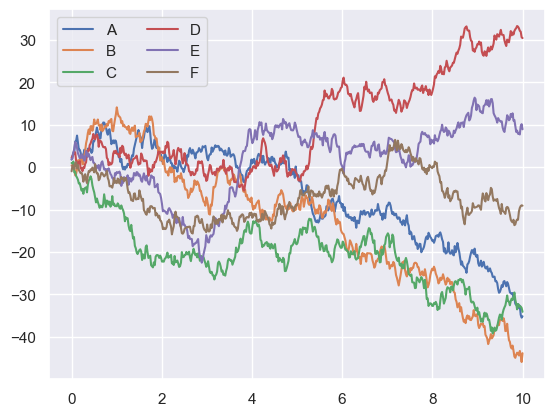

In [8]:
# 시각화의 기본 스타일을 Seaborn의 미적 요소로 변경
sns.set()

# 선형 그래프 그리기
# x: x축 데이터, y: y축 데이터 (6개의 선으로 구성된 다차원 데이터)
plt.plot(x, y)

# 범례 추가
# 'ABCDEF'는 각 선의 레이블을 나타냄 (각 선에 대해 A, B, C, D, E, F로 표시)
# ncol=2: 범례를 2열로 나누어 표시
# loc='upper left': 범례를 그래프의 왼쪽 상단에 배치
plt.legend('ABCDEF', ncol=2, loc='upper left');

## Matplotlib 과 Seaborn 의 미적인 측면 비교 - 3

- tips dataset 에서 요일별 평균 팁 금액을 남, 녀 고객 별 비교

In [9]:
# Seaborn에서 제공하는 샘플 데이터셋 "tips" 로드
# tips 데이터셋: 식당의 팁과 관련된 정보를 포함 (예: 총 금액, 팁 금액, 성별, 흡연 여부 등)
tips = sns.load_dataset("tips") 

tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [10]:
# day 가 category type 인지 확인
tips.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


## matplotlib - bar chart

### 어려운 시각화 방법

In [11]:
# tips 데이터셋의 'day' 열의 고유 범주(category)의 개수를 기반으로 배열 생성
# 'day' 열은 요일 정보를 담고 있으며, 이를 범주형 데이터로 변환한 후 고유한 범주 개수를 가져옵니다.
# len(tips['day'].cat.categories): 'day' 열의 고유 범주의 개수를 가져와 그 길이만큼 배열 생성
x = np.arange(len(tips['day'].cat.categories))  
x

array([0, 1, 2, 3])

In [12]:
# 'tips' 데이터프레임에서 성별(sex)에 따라 팁(tip)의 요일별 평균을 계산하여 저장

# 1. 남성(Male)의 팁 평균 계산
# 'sex'가 'Male'인 행만 필터링
tip1 = tips[tips['sex'] == 'Male']  
tip1

,total_bill,tip,sex,smoker,day,time,size
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
...,...,...,...,...,...,...,...
236,12.60,1.00,Male,Yes,Sat,Dinner,2
237,32.83,1.17,Male,Yes,Sat,Dinner,2
239,29.03,5.92,Male,No,Sat,Dinner,3
241,22.67,2.00,Male,Yes,Sat,Dinner,2


In [13]:
# grouping을 위해 'day' 컬럼을 문자열로 변환
tips['day'] = tips['day'].astype(str)
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    object  
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(3), float64(2), int64(1), object(1)
memory usage: 8.8+ KB


In [14]:
# 1. 남성(Male)의 팁 평균 계산
tip1 = tips[tips['sex'] == 'Male'].groupby('day')['tip'].mean()

# 2. 여성(Female)의 팁 평균 계산
tip2 = tips[tips['sex'] == 'Female'].groupby('day')['tip'].mean()

In [15]:
tip1.head()

day
Fri     2.693000
Sat     3.083898
Sun     3.220345
Thur    2.980333
Name: tip, dtype: float64

In [16]:
days = tip1.index
days

Index(['Fri', 'Sat', 'Sun', 'Thur'], dtype='object', name='day')

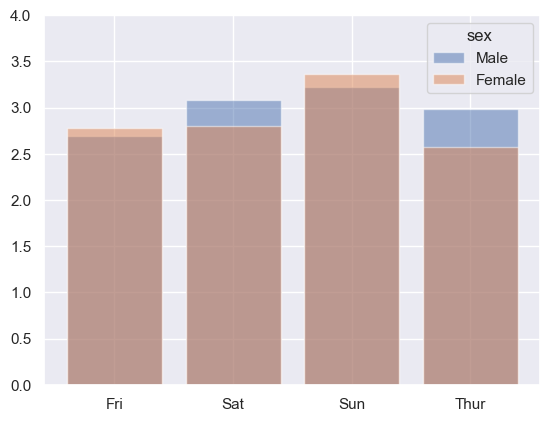

In [17]:
 # 그래프 영역과 축 생성
fig, ax = plt.subplots() 

# 남성(Male)의 팁 평균 데이터를 막대 그래프로 그리기
# x축 라벨을 days로 설정하고 투명도를 0.5로 지정
ax.bar(x, tip1, label='Male', tick_label=days, alpha=0.5)  

# 여성(Female)의 팁 평균 데이터를 막대 그래프로 그리기
# 투명도를 0.5로 지정하여 겹침 표시
ax.bar(x, tip2, label='Female', alpha=0.5)  

# y축 범위 설정 (0에서 4까지)
ax.set_ylim([0, 4])

# 범례 추가 및 제목 설정
plt.legend(title="sex")

plt.show()

- bar 의 사각형 범위를 조절하여 서로 겹치지 않도록 한다.

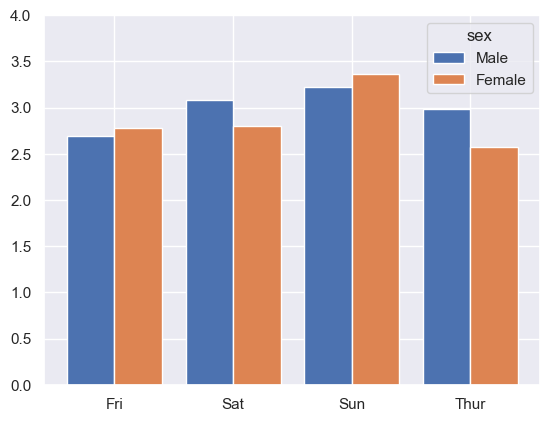

In [18]:
fig, ax = plt.subplots() 

# 남성(Male)의 팁 평균 데이터를 왼쪽으로 정렬하여 막대 그래프로 그리기
# width=-0.4: 막대 너비를 음수로 지정하여 막대를 x축 위치의 왼쪽으로 정렬
# tick_label=days: x축 레이블을 days 값으로 설정
ax.bar(x, tip1, width=-0.4, label='Male', tick_label=days, align='edge')

# 여성(Female)의 팁 평균 데이터를 오른쪽으로 정렬하여 막대 그래프로 그리기
# width=0.4: 막대 너비를 양수로 지정하여 막대를 x축 위치의 오른쪽으로 정렬
ax.bar(x, tip2, width=0.4, label='Female', align='edge')

# y축의 범위를 설정 (0에서 4까지)
ax.set_ylim([0, 4])

# 범례 추가 및 제목 설정
plt.legend(title="sex")

plt.show()

## Seaborn - barplot

### 쉬운 시각화 방법

- 포인트 추정치 및 신뢰 구간을 직사각형 막대로 표시 : 95% 신뢰구간

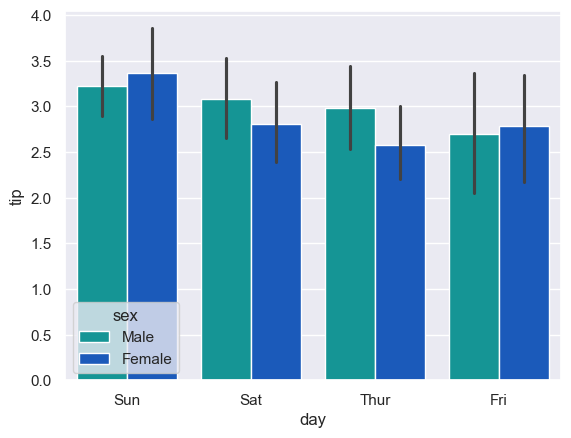

In [19]:
# 막대 그래프 그리기
sns.barplot(
    x="day",  # x축: 요일(day) 컬럼
    y="tip",  # y축: 팁(tip) 컬럼
    data=tips,  # 사용할 데이터프레임
    hue="sex",  # 성별(sex)별로 다른 색상을 사용
    palette="winter_r"  # 색상 팔레트 설정 (겨울 테마의 역순)
)

plt.show()

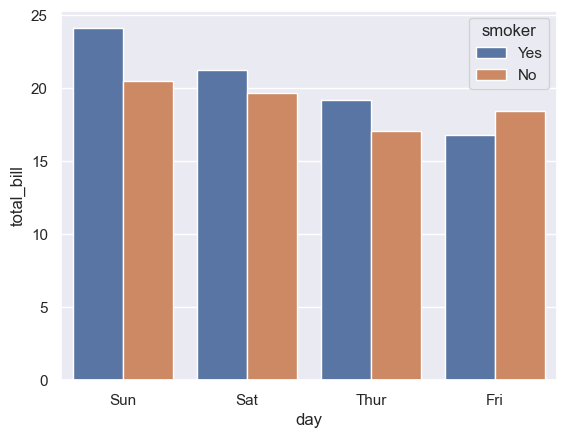

In [20]:
# 막대 그래프 그리기
sns.barplot(
    x="day",  # x축: 요일(day) 컬럼
    y="total_bill",  # y축: 총 계산 금액(total_bill) 컬럼
    data=tips,  # 사용할 데이터프레임
    hue="smoker",  # 흡연 여부(smoker)에 따라 다른 색상으로 구분
    errorbar=None  # 신뢰구간(confidence interval)을 표시하지 않음
)

# 그래프 표시
plt.show()

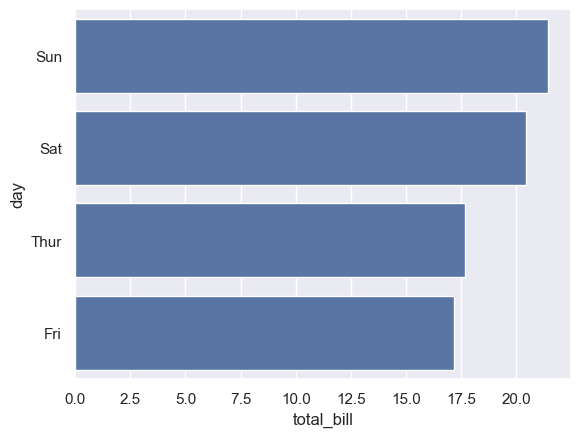

In [21]:
# 가로 막대 그래프 그리기
sns.barplot(
    y="day",         # y축: 요일(day) 컬럼 (가로 방향으로 배치)
    x="total_bill",  # x축: 총 계산 금액(total_bill) 컬럼
    data=tips,  # 사용할 데이터프레임
    errorbar=None  # 에러 바(신뢰구간) 비활성화
)

plt.show()

## 통계적 추론 (Statistical Estimation) 과 관련된 plot 들

- 전체 data 의 분포에 대한 plotting 

- 중심경향 추론(central tendency estimation) 에 사용되는 mean 과 median 에 관련된 plot 들

### boxplot - 범주와 관련된 분포를 표시하는 상자 그림

<img src="https://i.imgur.com/DR6IdpZ.png" width=500 />

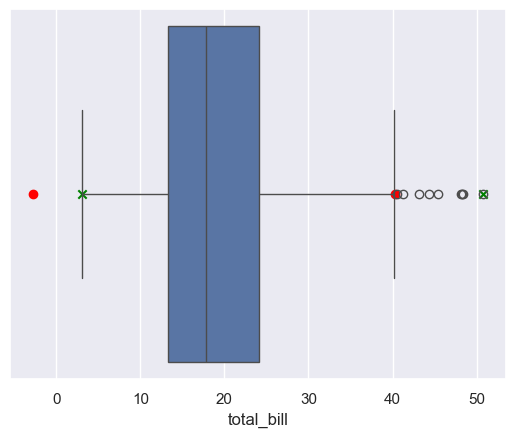

In [22]:
# IQR(사분위 범위) 계산
q1 = tips["total_bill"].quantile(0.25)  # 1사분위수(Q1): 데이터의 하위 25%
q3 = tips["total_bill"].quantile(0.75)  # 3사분위수(Q3): 데이터의 상위 75%
iqr = q3 - q1  # IQR(Interquartile Range): Q3 - Q1

# 하한 및 상한 계산 (IQR을 기반으로 한 이상치 범위 설정)
limit_lower = q1 - 1.5 * iqr  # 하한: Q1 - 1.5*IQR
limit_upper = q3 + 1.5 * iqr  # 상한: Q3 + 1.5*IQR

# 데이터의 최소값 및 최대값 계산
min_value = tips["total_bill"].min()  # 데이터의 최소값
max_value = tips["total_bill"].max()  # 데이터의 최대값

# 박스플롯 그리기
ax = sns.boxplot(x=tips["total_bill"])  # total_bill 데이터의 박스플롯 생성

# 하한값과 상한값을 빨간 점으로 표시
plt.scatter(limit_lower, 0, color='red')  # 하한값
plt.scatter(limit_upper, 0, color='red')  # 상한값

# 최소값과 최대값을 초록색 'x'로 표시
plt.scatter(min_value, 0, color='green', marker='x')  # 최소값
plt.scatter(max_value, 0, color='green', marker='x')  # 최대값

plt.show()

### Violine Plot

- box plot + kde (kernel density estimation) 을 하여 data 의 분포를 쉽게 파악할 수 있도록 한다.

- box plot 의 사분위수와 whisker 가 violin 내에 표시된다.  

- violin plot 이 kde 를 이용하므로 넓은 부분이 high density 이고, 좁은 부분이 low density 이다.  

- Box plot 의 사분위간 범위(Inter-Quartile range) 와 kde 의 higher density 부분이 같은 영역으로 일치한다.

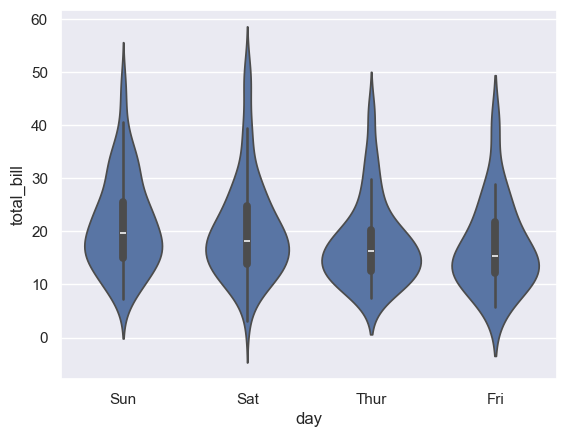

In [23]:
# 요일별 total_bill 금액 분포를 바이올린 플롯으로 시각화
sns.violinplot(
    x='day',         # x축: 요일(day) 컬럼
    y='total_bill',  # y축: 총 계산 금액(total_bill) 컬럼
    data=tips        # 사용할 데이터프레임
)

plt.show()

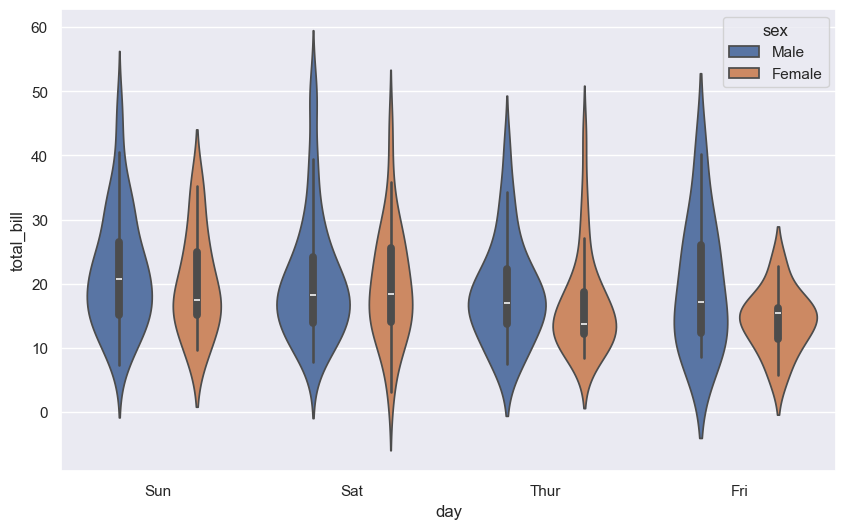

In [24]:
# 요일별 성별 total_bill 분포를 바이올린 플롯으로 시각화
fig, ax = plt.subplots(figsize=(10, 6)) 

sns.violinplot(
    x='day',         # x축: 요일(day) 컬럼
    y='total_bill',  # y축: 총 계산 금액(total_bill) 컬럼
    hue='sex',  # 성별(sex)에 따라 색상 구분 (Male/Female)
    data=tips,  # 사용할 데이터프레임
    ax=ax       # 현재 서브플롯(ax)에 그래프를 그리도록 지정
)

plt.show()

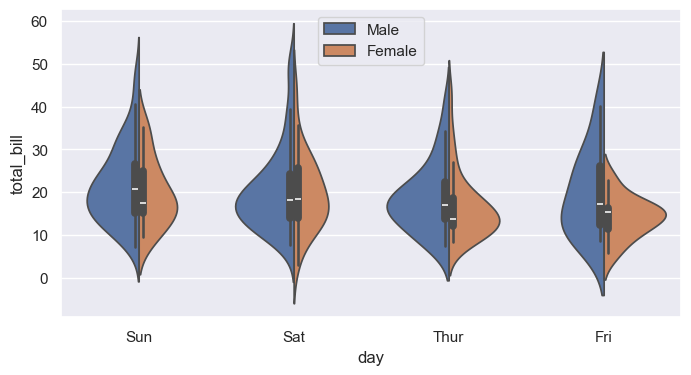

In [25]:
# 요일별 성별 total_bill 분포를 바이올린 플롯으로 시각화
fig, ax = plt.subplots(figsize=(8, 4))  

sns.violinplot(
    x='day',         # x축: 요일(day) 컬럼
    y='total_bill',  # y축: 총 계산 금액(total_bill) 컬럼
    hue='sex',  # 성별(sex)에 따라 색상 구분 (Male/Female)
    data=tips,  # 사용할 데이터프레임
    split=True  # 성별 분포를 동일한 x축 내에서 나누어 표시
)

# 범례의 위치를 그래프 상단 중앙에 배치
ax.legend(loc="upper center")

plt.show()

## 변수 한개 (Univariate) 의 분포를 그리는 기능

### Histogram

In [26]:
import seaborn as sns

# Seaborn의 'iris' 샘플 데이터셋 로드
df = sns.load_dataset('iris')  

<Axes: xlabel='petal_length', ylabel='Count'>

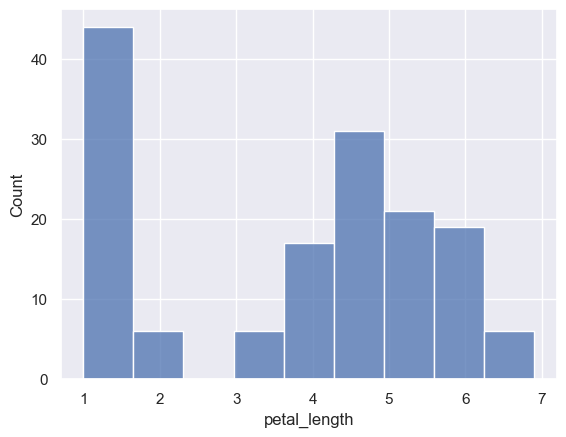

In [27]:
# 히스토그램으로 시각화할 데이터 (꽃잎의 길이)
sns.histplot(df['petal_length'])

커널 밀도 추정 (KDE) 플롯은 히스토그램에 대한 분석인 데이터세트의 관측 값 분포를 시각화. KDE는 하나 이상의 차원에서 연속 확률 밀도 곡선을 사용하여 데이터를 나타냅니다.

<Axes: xlabel='petal_length', ylabel='Count'>

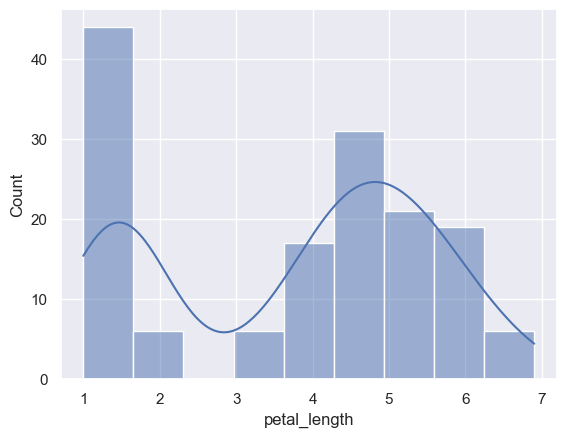

In [28]:
sns.histplot(df['petal_length'], kde=True)

## 변수두개(bivariate) 분포를 그리는 기능

### Histogram using Matplotlib

- multivariate_normal(mean, cov, size)  

In [29]:
# 다변량 정규분포 데이터 생성
data = np.random.multivariate_normal(
    [0, 0],           # 평균 벡터
    [[5, 2], [2, 2]],  # 공분산 행렬
    size=2000  # 생성할 샘플의 개수: 2000개
)

data = pd.DataFrame(data, columns=['x', 'y'])
data.head()

,x,y
0,0.461623,1.556785
1,-1.634218,-1.315271
2,0.262636,0.549029
3,-4.061499,-0.468918
4,-4.693002,-2.286679


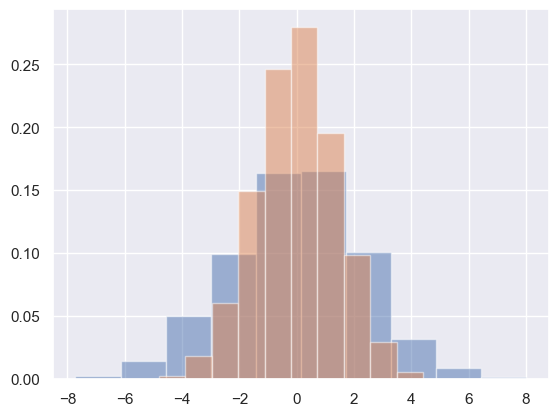

In [30]:
# 'x'와 'y' 컬럼에 대해 히스토그램 생성
for col in 'xy':  # 'x'와 'y' 두 컬럼에 대해 반복
    plt.hist(
        data[col],  # 히스토그램으로 시각화할 데이터
        density=True,  # 히스토그램의 높이를 밀도로 표시 (빈도수가 아닌 확률 밀도)
        alpha=0.5  # 히스토그램의 투명도를 50%로 설정
    )

plt.show()

### kde plot using seaborn

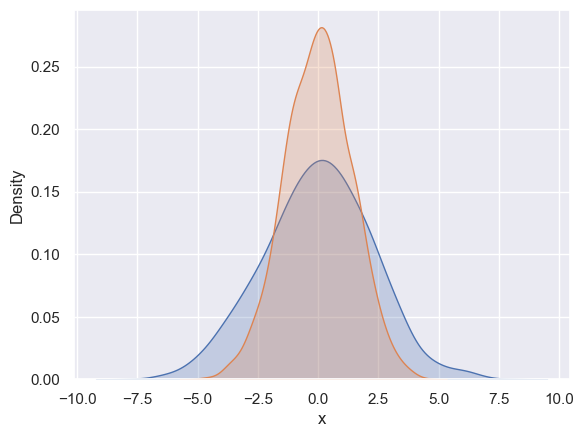

In [31]:
# 'x'와 'y' 컬럼에 대해 커널 밀도 추정(KDE) 그래프 생성
for col in 'xy':  # 'x'와 'y' 두 컬럼에 대해 반복
    sns.kdeplot(
        data[col],  # KDE를 적용할 데이터
        fill=True  # 커널 밀도 아래 영역을 채움
    )

plt.show()

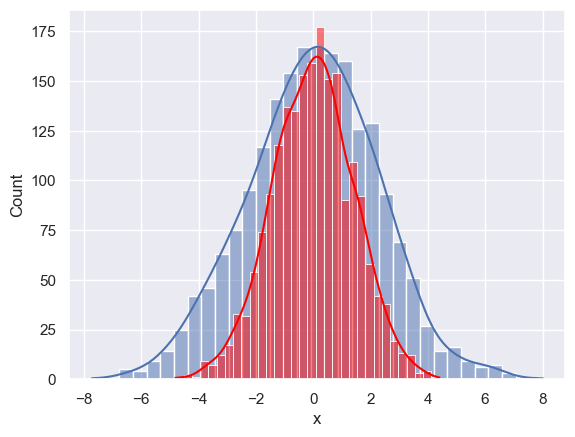

In [32]:
# 'x' 컬럼에 대한 히스토그램 및 커널 밀도 추정(KDE) 그래프
sns.histplot(
    data['x'],  # 히스토그램으로 시각화할 데이터 (x 컬럼)
    kde=True  # 커널 밀도 추정(KDE) 곡선을 함께 표시
)

# 'y' 컬럼에 대한 히스토그램 및 커널 밀도 추정(KDE) 그래프 (빨간색으로 표시)
sns.histplot(
    data['y'],  # 히스토그램으로 시각화할 데이터 (y 컬럼)
    kde=True,  # 커널 밀도 추정(KDE) 곡선을 함께 표시
    color='red'  # 히스토그램과 KDE 곡선을 빨간색으로 표시
)

plt.show()

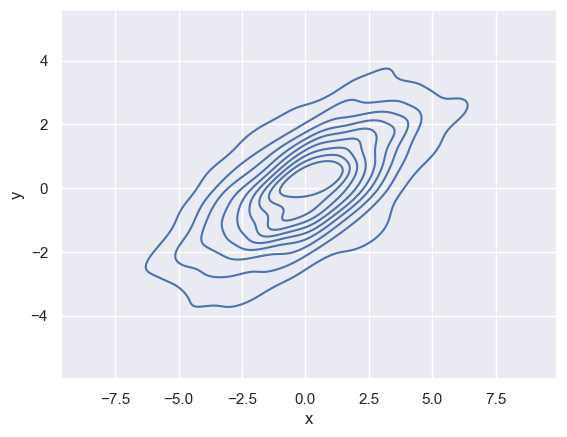

In [33]:
# 이변량 커널 밀도 추정(KDE) 그래프 생성
sns.kdeplot(
    x=data['x'],  # x축 데이터 (x 컬럼)
    y=data['y']   # y축 데이터 (y 컬럼)
)

plt.show()

### jointplot()

### Joint Scatter Plot

-  `scatterplot` + `marginal histograms`  


- `kind{ “scatter” | “kde” | “hist” | “hex” | “reg” | “resid” }`

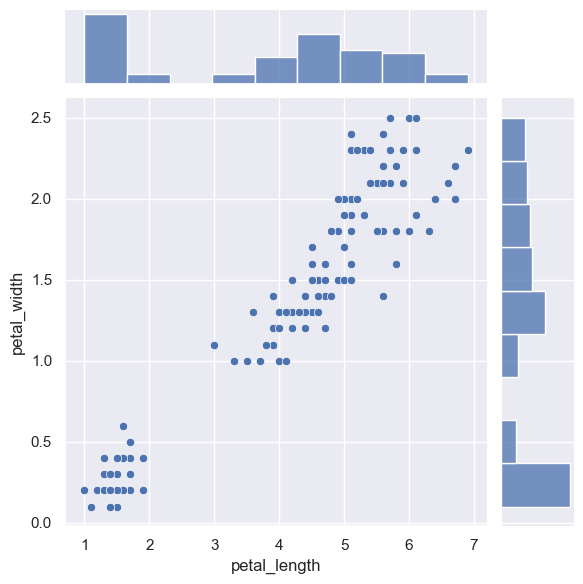

In [34]:
# 이변량 데이터 시각화를 위한 조인트 플롯 생성
sns.jointplot(
    x='petal_length',  # x축 데이터: 꽃잎의 길이 (petal_length)
    y='petal_width',   # y축 데이터: 꽃잎의 너비 (petal_width)
    data=df            # 사용할 데이터프레임 (iris 데이터셋)
)

plt.show()

### Kernel Density Eestimation

- variable 의 분포를 보는 방법

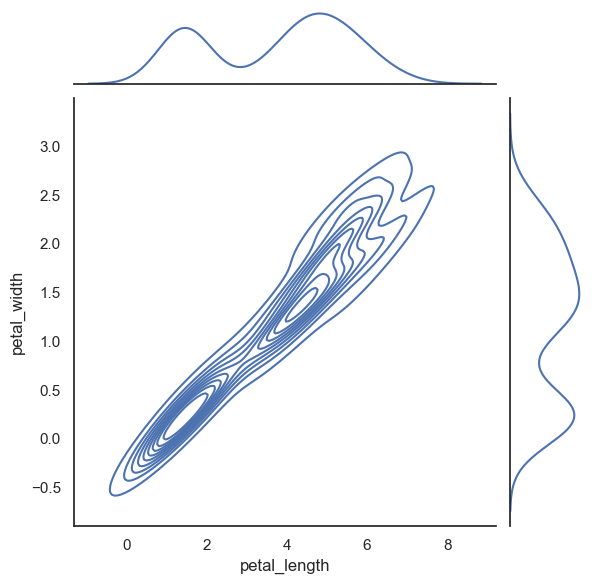

In [35]:
# 스타일 지정 및 KDE 조인트 플롯 생성
with sns.axes_style('white'):  # 그래프 스타일 설정 ('white': 깔끔한 흰색 배경)
    sns.jointplot(
        x='petal_length',  # x축 데이터: 꽃잎의 길이 (petal_length)
        y='petal_width',   # y축 데이터: 꽃잎의 너비 (petal_width)
        data=df,           # 사용할 데이터프레임 (iris 데이터셋)
        kind='kde'         # 커널 밀도 추정(KDE) 스타일: 데이터의 밀도를 등고선으로 시각화
    )

plt.show()

### Hexbin Plot

- Hexaginal binning 은 data 밀도가 sparse 한 경우의 bivariate data 분석에 사용  
    ==> data 가 너무 퍼져있어서 scatter plot 으로 분석하기 어려운 경우 사용

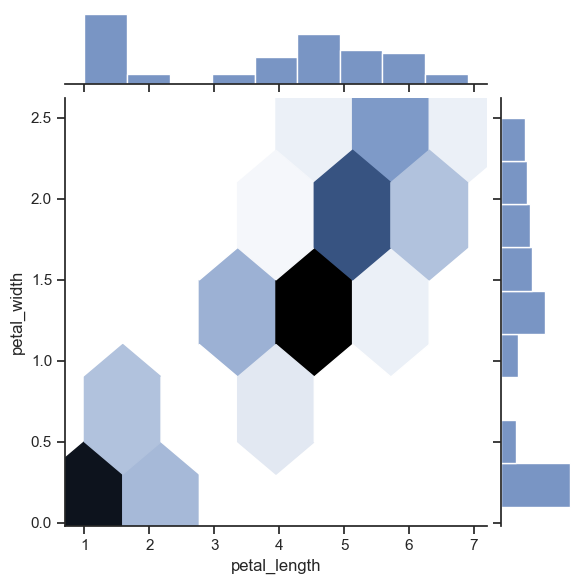

In [36]:
# 스타일 지정 및 헥스빈 조인트 플롯 생성
with sns.axes_style('ticks'):  # 그래프 스타일 설정 ('ticks', 'whitegrid', 'white' 중 선택 가능)
    sns.jointplot(
        x='petal_length',  # x축 데이터: 꽃잎의 길이 (petal_length)
        y='petal_width',   # y축 데이터: 꽃잎의 너비 (petal_width)
        data=df,           # 사용할 데이터프레임 (iris 데이터셋)
        kind='hex'         # 헥스빈(Hexbin) 플롯 스타일: 데이터의 밀도를 육각형으로 표시
    )

plt.show()

### Pairwise Relationship

- 다변량 분석의 경우 각각의 변수를 짝지워 Bivariate Distribution 표시 - (n, 2) combination  

- sns.pairplot()

- hue : 색깔 구분을 할 변수  

- diag_kind : 대각선에 배치할 subplots (hist or kde)

In [37]:
df.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


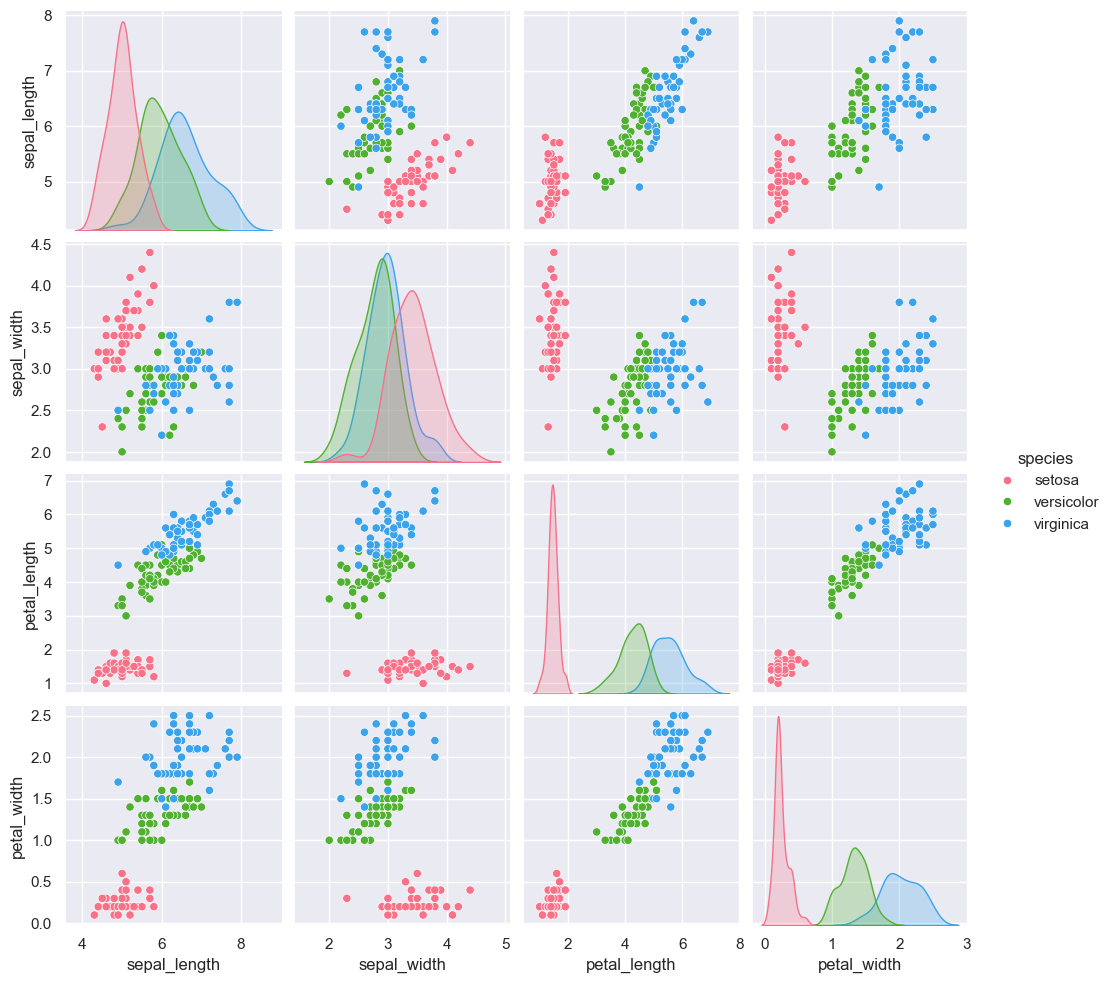

In [38]:
# 페어플롯(pairplot) 생성
sns.pairplot(
    df,              # 사용할 데이터프레임 (iris 데이터셋)
    hue='species',   # 범례로 사용할 컬럼 (붓꽃의 종류: setosa, versicolor, virginica)
    diag_kind='kde',  # 대각선에 표시할 플롯 종류 (커널 밀도 추정 KDE)
    kind='scatter',   # 이변량 플롯 종류 (산점도 scatter)
    palette='husl'    # 색상 팔레트 설정 (HUSL 색상 팔레트)
)

plt.show()

## Categorical Data plotting 

- 지금까지 위에서 그린 것은 연속된 값을 plot 한 것이므로, categorical variable 에는 적합하지 않음  

### stripplot : 하나의 변수가 범주형인 산점도

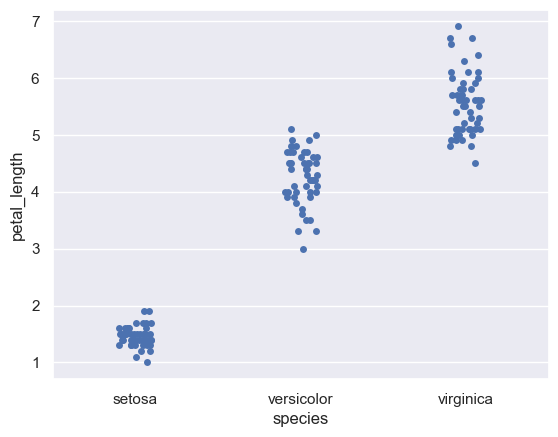

In [39]:
# 스트립 플롯(stripplot) 생성
sns.stripplot(
    x='species',       # x축 데이터: 붓꽃의 종류(species)
    y='petal_length',  # y축 데이터: 꽃잎의 길이(petal_length)
    data=df        # 사용할 데이터프레임 (iris 데이터셋)
)

plt.show()

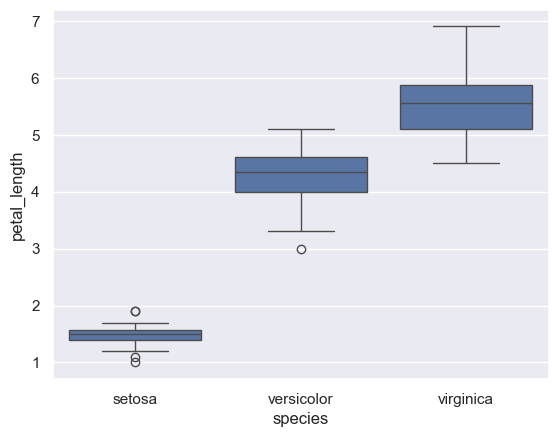

In [40]:
# 박스플롯(boxplot) 생성
sns.boxplot(
    x='species',  # x축 데이터: 붓꽃의 종류(species)
    y='petal_length',  # y축 데이터: 꽃잎의 길이(petal_length)
    data=df      # 사용할 데이터프레임 (iris 데이터셋)
)

plt.show()